In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn

seaborn.set()

data = pd.read_csv('cleaned_data.csv', encoding = "ISO-8859-1")

In [2]:
number_of_artist = len(data.artist.unique())
number_of_reviews = len(data)
print('--- GENERAL STATISTICS ---')
print(' Number of reviews: {}\n Unique artists: {}'.format(number_of_reviews, number_of_artist))

--- GENERAL STATISTICS ---
 Number of reviews: 18959
 Unique artists: 9290


In [88]:
q1 = data.score.quantile(0.25)
q2 = data.score.quantile(0.5)
q3 = data.score.quantile(0.75)
mean = data.score.mean()
maximum = data.score.max()
minimum = data.score.min()
top_scores = data.score.value_counts()
num_z = len(data[data.score == 0.0])
num_t = len(data[data.score == 10])
print('--- SCORE STATISTICS ---')
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
print('\nNumber of albums rated 0.0: {}'.format(num_z))
print('Number of albums rated 10: {}'.format(num_t))
#print('\nTop scores:\n{}'.format(top_scores))

--- SCORE STATISTICS ---
 Quartile 1: 6.4
 Quartile 2 (median): 7.2
 Quartile 3: 7.8
 Mean: 7.02
 Min: 0.0
 Max: 10.0

Number of albums rated 0.0: 7
Number of albums rated 10: 85


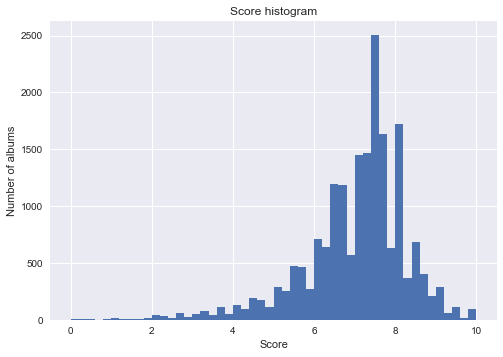

In [25]:
plt.hist(data.score, bins = 50)
plt.title('Score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

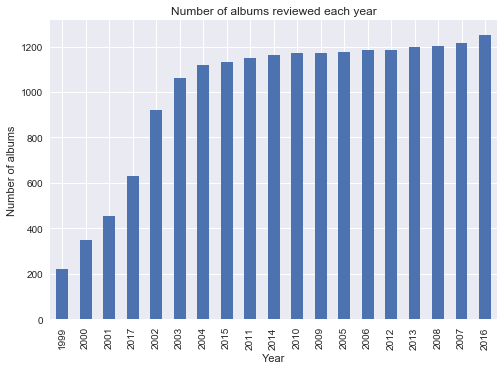

In [26]:
data.review_date_year.value_counts(ascending = True).plot(kind='bar')
plt.title('Number of albums reviewed each year')
plt.xlabel('Year')
plt.ylabel('Number of albums')
plt.show()

--- AUTHORS' STATISTICS ---
Number of authors: 431

Top authors (by number of reviews written):
Joe Tangari           814
Stephen M. Deusner    747
Ian Cohen             718
Mark Richardson       612
Brian Howe            502
Stuart Berman         467
Marc Hogan            443
Nate Patrin           356
Marc Masters          326
Jayson Greene         309
Name: review_author, dtype: int64



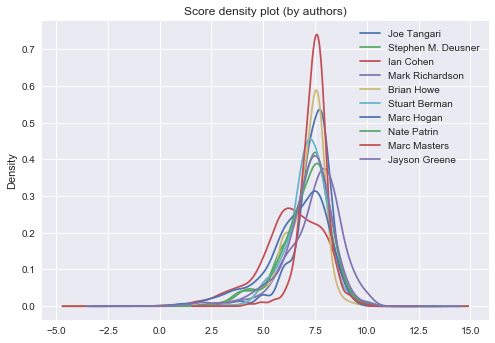

In [93]:
number_of_authors = len(data.review_author.unique())
top_authors_names = data.review_author.value_counts()[:10].keys()
top_authors_numbers = data.review_author.value_counts()[:10]
print('--- AUTHORS\' STATISTICS ---')
print('Number of authors: {}\n\nTop authors (by number of reviews written):\n{}\n'.format(number_of_authors, top_authors_numbers))

for author in top_authors_names:
    d = data[data.review_author == author]
    d.score.plot(kind = 'kde', label = author)
plt.title('Score density plot (by authors)')
plt.legend(loc = 'best')
plt.show()

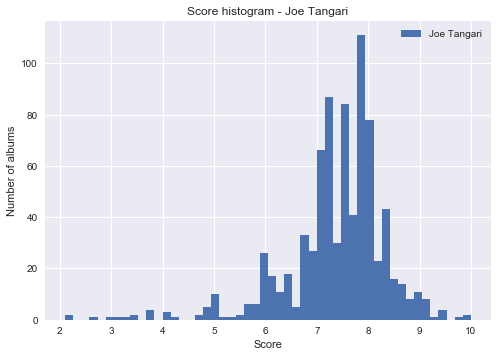

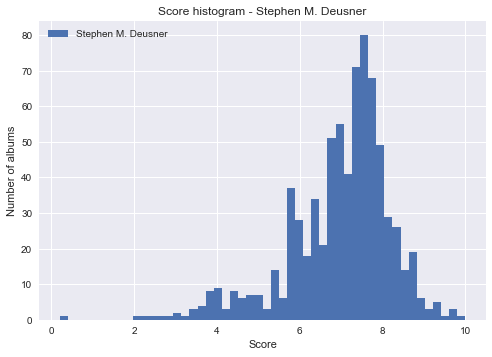

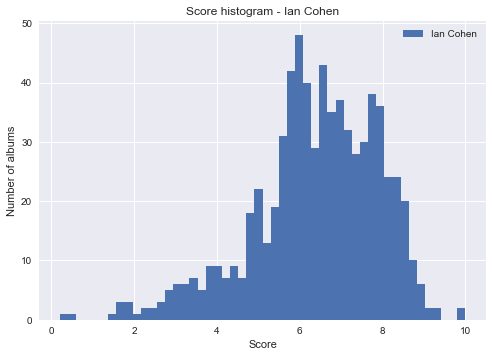

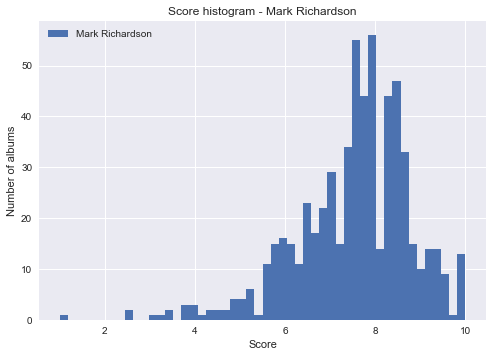

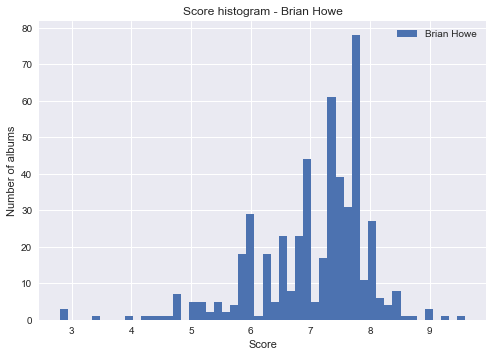

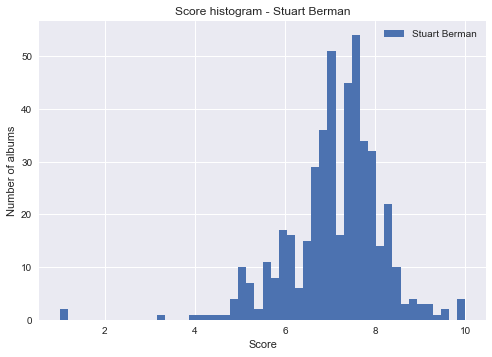

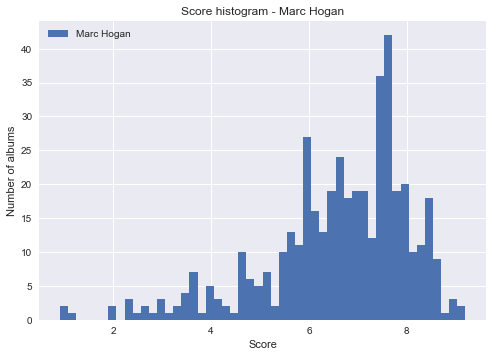

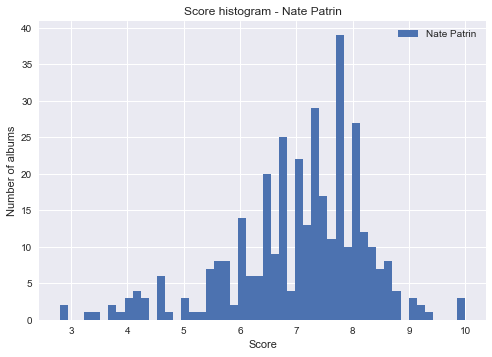

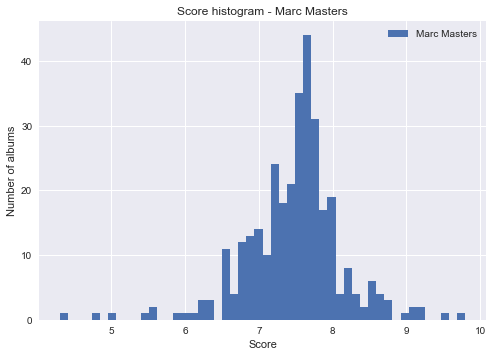

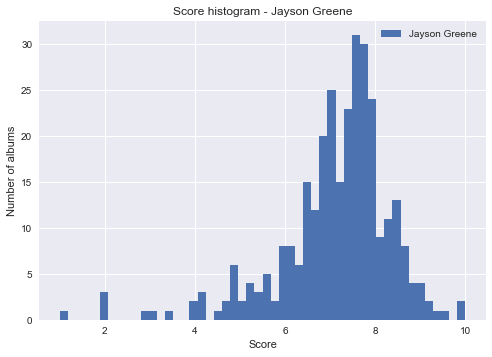

In [40]:
for author in top_authors_names:
    plt.figure()
    d = data[data.review_author == author]
    plt.hist(d.score, bins = 50, label = author)
    plt.title('Score histogram - {}'.format(author))
    plt.xlabel('Score')
    plt.ylabel('Number of albums')
    plt.legend(loc ='best')
    plt.show()

In [7]:
number_of_artists = len(data.artist.unique())
top_artists_names = data.artist.value_counts()[:10].keys() 
top_artists_numbers = data.artist.value_counts()[1:11] # excluding 'various artists' from the list
print('--- ARTISTS\' STATISTICS ---')
print('Number of artists: {}\ntop artists:\n{}\n'.format(number_of_artists, top_artists_numbers))

--- ARTISTS' STATISTICS ---
Number of artists: 9290
top artists:
Guided by Voices     24
The Beatles          20
Mogwai               20
Of Montreal          19
Animal Collective    19
David Bowie          18
Xiu Xiu              18
Robert Pollard       17
Neil Young           17
Bob Dylan            17
Name: artist, dtype: int64



--- 'BEST NEW MUSIC' SCORE STATISTICS ---
Number of albums labeled as 'Best new music': 654
 Quartile 1: 8.4
 Quartile 2 (median): 8.5
 Quartile 3: 8.8
 Mean: 8.61
 Min: 7.9
 Max: 10.0


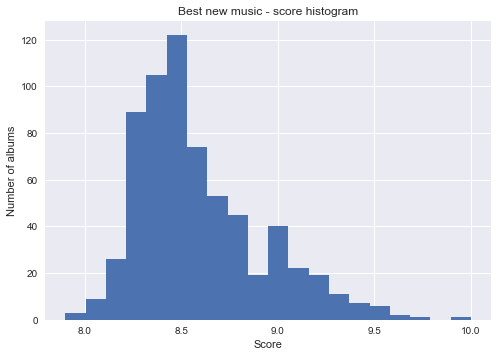

In [29]:
bnm = data[data.merit.str.contains('Best new music') == True]
number_of_bnm = len(bnm.score)
q1 = bnm.score.quantile(0.25)
q2 = bnm.score.quantile(0.5)
q3 = bnm.score.quantile(0.75)
mean = bnm.score.mean()
maximum = bnm.score.max()
minimum = bnm.score.min()
print('--- \'BEST NEW MUSIC\' SCORE STATISTICS ---')
print('Number of albums labeled as \'Best new music\': {}'.format(number_of_bnm))
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
plt.hist(bnm.score, bins = 20)
plt.title('Best new music - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

--- 'BEST NEW REISSUE' SCORE STATISTICS ---
Number of albums labeled as 'Best new reissue': 335
 Quartile 1: 8.5
 Quartile 2 (median): 8.7
 Quartile 3: 9.1
 Mean: 8.83
 Min: 5.2
 Max: 10.0


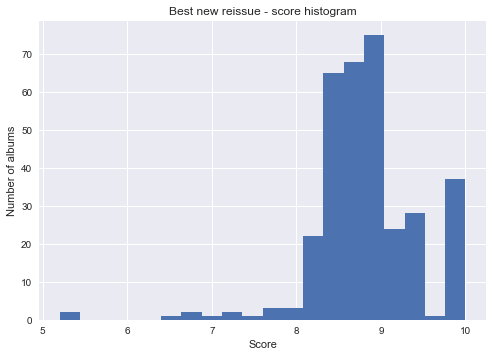

In [30]:
bnr = data[data.merit.str.contains('Best new reissue') == True]
number_of_bnr = len(bnr.score)
q1 = bnr.score.quantile(0.25)
q2 = bnr.score.quantile(0.5)
q3 = bnr.score.quantile(0.75)
mean = bnr.score.mean()
maximum = bnr.score.max()
minimum = bnr.score.min()
print('--- \'BEST NEW REISSUE\' SCORE STATISTICS ---')
print('Number of albums labeled as \'Best new reissue\': {}'.format(number_of_bnr))
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
plt.hist(bnr.score, bins = 20)
plt.title('Best new reissue - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

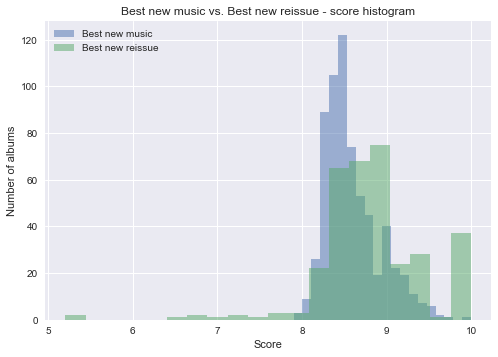

In [34]:
plt.hist(bnm.score, alpha = 0.5, label = 'Best new music', bins = 20)
plt.hist(bnr.score, alpha = 0.5, label = 'Best new reissue', bins = 20)
plt.title('Best new music vs. Best new reissue - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.legend(loc='upper left');
plt.show()

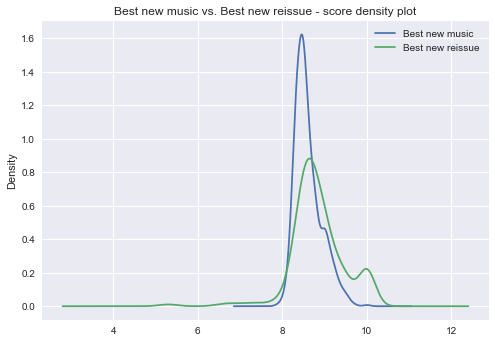

In [35]:
bnm.score.plot(kind='kde', label = 'Best new music')
bnr.score.plot(kind='kde', label = 'Best new reissue')
plt.title('Best new music vs. Best new reissue - score density plot')
plt.legend(loc='best')
plt.show()

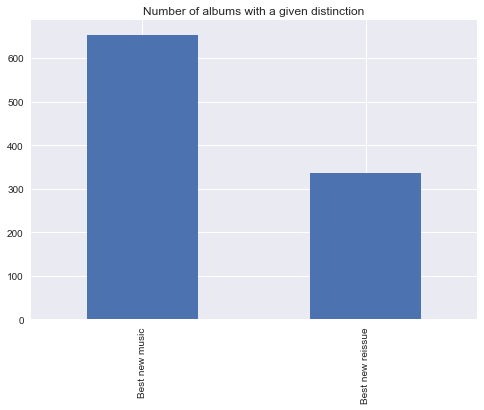

In [67]:
data.merit.value_counts().plot(kind = 'bar')
plt.title('Number of albums with a given distinction')
plt.show()

--- Number of albums reviewed (by genre) - top 10 ---

Rock                 6652
Electronic           2111
Rap                  1327
Electronic,Rock      1163
Pop/R&B               917
Experimental,Rock     883
Experimental          617
Folk/Country          579
Metal,Rock            362
Metal                 360
Name: genre, dtype: int64


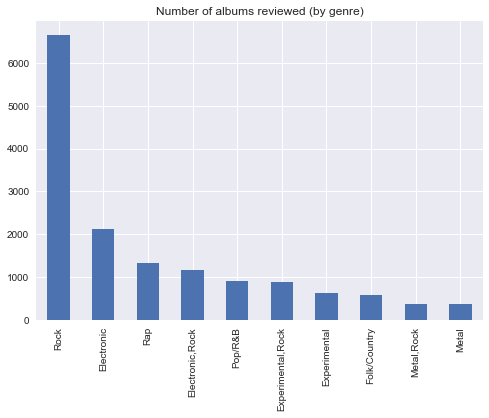

In [90]:
top_genres = data.genre.value_counts()[:10]
print('--- Number of albums reviewed (by genre) - top 10 ---\n')
print(top_genres)
top_genres.plot(kind = 'bar')
plt.title('Number of albums reviewed (by genre)')
plt.show()